In [1]:
import numpy as np
import pandas as pd
import os
import regex as re

In [2]:
cwd = os.getcwd()
print(cwd)

/home/jovyan/work/Social_Network_Analysis/microfinance_indian_villages/datav4.0/Data


In [3]:
path_demo = '/usr/snap/notebooks/microfinance_indian_villages/datav4.0/Data/2. Demographics and Outcomes'
path_key = '/usr/snap/notebooks/microfinance_indian_villages/datav4.0/Data/1. Network Data/Adjacency Matrix Keys'
path_adj = '/usr/snap/notebooks/microfinance_indian_villages/datav4.0/Data/1. Network Data/Adjacency Matrices'
file1 =  'household_characteristics.dta'
file2 = 'individual_characteristics.dta'

In [4]:
os.chdir(path_demo)

FileNotFoundError: [Errno 2] No such file or directory: '/usr/snap/notebooks/microfinance_indian_villages/datav4.0/Data/2. Demographics and Outcomes'

In [405]:
os.listdir(path='.')

['household_characteristics.dta', 'individual_characteristics.dta']

# Background

This project contains data from a survey of social networks in 75 villages in rural southern Karnataka, a state in India. A census of households was conducted, and a subset of individuals was asked detailed questions about the
relationships they had with others in the village. This information was used to create network graphs for each village, included here. Basic information for all households and all surveyed individuals is also provided.


Previously, these 75 villages had been identified by Bharatha Swamukti Samsthe (a microfinance institution) as places where it planned to start operations. Six months after the survey, BSS began expanding to these villages and in two years eventually spread to 43 of them. Information about which households participated in BSS's microfinance program was matched to the household census.

## Individual Characteristics

In [406]:
df2 = pd.io.stata.read_stata(file2)

In [407]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16984 entries, 0 to 16983
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   village            16984 non-null  int8    
 1   adjmatrix_key      16984 non-null  int16   
 2   pid                16984 non-null  int32   
 3   hhid               16984 non-null  int32   
 4   resp_id            16984 non-null  int8    
 5   resp_gend          16984 non-null  int8    
 6   resp_status        16984 non-null  category
 7   age                16984 non-null  int8    
 8   religion           16983 non-null  category
 9   caste              16951 non-null  category
 10  subcaste           16984 non-null  object  
 11  mothertongue       16984 non-null  object  
 12  speakother         16984 non-null  category
 13  kannada            16984 non-null  category
 14  tamil              16984 non-null  category
 15  telugu             16984 non-null  category
 16  hind

## Subsetting only Village == 1

In [408]:
is_vill1 = df2['village'] == 1

In [409]:
subset_vilno_1 = df2[is_vill1]

In [410]:
subset_vilno_1.head()

,village,adjmatrix_key,pid,hhid,resp_id,resp_gend,resp_status,age,religion,caste,...,privategovt,work_outside,work_outside_freq,shgparticipate,shg_no,savings,savings_no,electioncard,rationcard,rationcard_colour
0,1,5,100201,1002,1,1,Head of Household,38,HINDUISM,OBC,...,PRIVATE BUSINESS,Yes,0,No,NaN,No,NaN,Yes,Yes,GREEN
1,1,6,100202,1002,2,2,Spouse of Head of Household,27,HINDUISM,OBC,...,,NaN,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
2,1,23,100601,1006,1,1,Head of Household,29,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
3,1,24,100602,1006,2,2,Spouse of Head of Household,24,HINDUISM,OBC,...,PRIVATE BUSINESS,No,NaN,Yes,1,Yes,1.0,Yes,No,
4,1,27,100701,1007,1,1,Head of Household,58,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN


In [411]:
subset_vilno_1.shape

(203, 48)

In [412]:
subset_vilno_1.columns

Index(['village', 'adjmatrix_key', 'pid', 'hhid', 'resp_id', 'resp_gend',
       'resp_status', 'age', 'religion', 'caste', 'subcaste', 'mothertongue',
       'speakother', 'kannada', 'tamil', 'telugu', 'hindi', 'urdu', 'english',
       'otherlang', 'educ', 'villagenative', 'native_name', 'native_type',
       'native_taluk', 'native_district', 'res_time_yrs', 'res_time_mths',
       'movereason', 'movecontact', 'movecontact_res', 'movecontact_hhid',
       'movecontact_pid', 'movecontact_name', 'workflag', 'work_freq',
       'work_freq_type', 'occupation', 'privategovt', 'work_outside',
       'work_outside_freq', 'shgparticipate', 'shg_no', 'savings',
       'savings_no', 'electioncard', 'rationcard', 'rationcard_colour'],
      dtype='object')

## Data

The “Data” folder contains two subfolders: “Network Data” and “Demographics and Outcomes.” In the "Network Data" folder, there are adjacency matrices for each of the 75 villages surveyed. The 75 villages are numbered 1-77 (villages 13 and 22 are missing.) About half of households received detailed surveys in which individuals were asked to list the names of people with whom they shared a certain relationship. Households were randomly sampled and stratified by religion and geographic sub-region.


For each variable, an individual matrix and a household matrix were constructed. A relationship between households exists if any household members indicated a relationship with members from the other household. These questions were asked in the individual survey.

Individuals were asked who they:
- borrow money from
- give advice to
- help with a decision
- borrow kerosene or rice from
- lend kerosene or rice to
- lend money to
- obtain medical advice from
- engage socially with
- are related to
- go to temple with
- invite to one's home
- visit in another's home.

We also include the ALL network which is a union and an AND network which is the intersection. This is done both at the individual and household levels.

### Let's pick one example: adj_templecompany_vilno_1.csv AND relate to key_vilno_1.csv

For instance, using the file "adj_templecompany_vilno_1.csv," we discover that the individual in the fifth row goes to the same temple as the individual in the eigth row. Using "key_vilno_1.csv," we can determine that in the individual in the fifth row has an ID of 100201, and the individual in the eighth row has an ID of 100204. We can then look up demographic information about these individuals using the dataset in the "Demographics and Outcomes" folder by matching on the ID variable.

The **networks are undirected (each matrix is symmetric)**. Each row or column of a matrix represents one individual. The matrices lack row or column headers, but in the folder "adjacency matrix keys" there are files that link each row (or the equivalent column) to a particular individual or household

In [413]:
os.listdir(path=path_key)[:10]

['key_HH_vilno_1.csv',
 'key_HH_vilno_10.csv',
 'key_HH_vilno_11.csv',
 'key_HH_vilno_12.csv',
 'key_HH_vilno_14.csv',
 'key_HH_vilno_15.csv',
 'key_HH_vilno_16.csv',
 'key_HH_vilno_17.csv',
 'key_HH_vilno_18.csv',
 'key_HH_vilno_19.csv']

In [414]:
key_vil = [f for f in sorted(os.listdir(path=path_key)) if 'HH' not in f]
key_vil = sorted(key_vil, key=lambda x: int(os.path.splitext(x.split('_')[2])[0]))

In [415]:
key_vil[:3]

['key_vilno_1.csv', 'key_vilno_2.csv', 'key_vilno_3.csv']

In [416]:
list(enumerate(key_vil))[:4]

[(0, 'key_vilno_1.csv'),
 (1, 'key_vilno_2.csv'),
 (2, 'key_vilno_3.csv'),
 (3, 'key_vilno_4.csv')]

In [417]:
os.chdir(path_key)
print(os.getcwd())

/usr/snap/notebooks/microfinance_indian_villages/datav4.0/Data/1. Network Data/Adjacency Matrix Keys


In [418]:
key_vilno1 = pd.read_csv('key_vilno_1.csv',header=None)

In [419]:
key_vilno1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       843 non-null    int64
dtypes: int64(1)
memory usage: 6.7 KB


In [420]:
key_vilno1.columns=['pid']

In [421]:
key_vilno1.head(9)

,pid
0,100101
1,100102
2,100103
3,100104
4,100201
5,100202
6,100203
7,100204
8,100205


In [422]:
key_vilno1.shape

(843, 1)

In [423]:
os.chdir(path_adj)
print(os.getcwd())

/usr/snap/notebooks/microfinance_indian_villages/datav4.0/Data/1. Network Data/Adjacency Matrices


In [424]:
files_vilno_1 = [f for f in os.listdir(path=path_adj) if '_vilno_1.' in f and 'HH' not in f]

In [425]:
list(enumerate(files_vilno_1))

[(0, 'adj_allVillageRelationships_vilno_1.csv'),
 (1, 'adj_andRelationships_vilno_1.csv'),
 (2, 'adj_borrowmoney_vilno_1.csv'),
 (3, 'adj_giveadvice_vilno_1.csv'),
 (4, 'adj_helpdecision_vilno_1.csv'),
 (5, 'adj_keroricecome_vilno_1.csv'),
 (6, 'adj_keroricego_vilno_1.csv'),
 (7, 'adj_lendmoney_vilno_1.csv'),
 (8, 'adj_medic_vilno_1.csv'),
 (9, 'adj_nonrel_vilno_1.csv'),
 (10, 'adj_rel_vilno_1.csv'),
 (11, 'adj_templecompany_vilno_1.csv'),
 (12, 'adj_visitcome_vilno_1.csv'),
 (13, 'adj_visitgo_vilno_1.csv')]

In [426]:
sequencia = [(((list(enumerate(files_vilno_1))[i][0])),((list(enumerate(files_vilno_1))[i][1]).split('_')[1])) for i in range(14)]

In [427]:
df_vilno_1 = [pd.read_csv(file, header=None) for file in files]

In [428]:
df_vilno_1[11].head()

,0,1,2,3,4,5,6,7,8,9,...,833,834,835,836,837,838,839,840,841,842
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [429]:
df_vilno_1[11].shape

(843, 843)

In [430]:
pd_vil1 = pd.merge(key_vilno1,subset_vilno_1,how='left',on='pid')

In [431]:
pd_vil1.loc[pd_vil1['village'] > 0]

,pid,village,adjmatrix_key,hhid,resp_id,resp_gend,resp_status,age,religion,caste,...,privategovt,work_outside,work_outside_freq,shgparticipate,shg_no,savings,savings_no,electioncard,rationcard,rationcard_colour
4,100201,1.0,5.0,1002.0,1.0,1.0,Head of Household,38.0,HINDUISM,OBC,...,PRIVATE BUSINESS,Yes,0,No,NaN,No,NaN,Yes,Yes,GREEN
5,100202,1.0,6.0,1002.0,2.0,2.0,Spouse of Head of Household,27.0,HINDUISM,OBC,...,,NaN,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
22,100601,1.0,23.0,1006.0,1.0,1.0,Head of Household,29.0,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
23,100602,1.0,24.0,1006.0,2.0,2.0,Spouse of Head of Household,24.0,HINDUISM,OBC,...,PRIVATE BUSINESS,No,NaN,Yes,1,Yes,1.0,Yes,No,
26,100701,1.0,27.0,1007.0,1.0,1.0,Head of Household,58.0,HINDUISM,OBC,...,OTHER LAND,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,117202,1.0,791.0,1172.0,2.0,2.0,Spouse of Head of Household,62.0,HINDUISM,OBC,...,IN LAND LORD,No,NaN,No,NaN,No,NaN,Yes,Yes,GREEN
791,117203,1.0,792.0,1172.0,3.0,2.0,Other,30.0,HINDUISM,OBC,...,LAND LORD,No,NaN,No,NaN,No,NaN,Yes,Yes,YELLOW
794,117301,1.0,795.0,1173.0,1.0,1.0,Head of Household,75.0,HINDUISM,OBC,...,,NaN,NaN,No,NaN,No,NaN,Yes,Yes,APL
801,117403,1.0,802.0,1174.0,3.0,2.0,Other,26.0,HINDUISM,SCHEDULED CASTE,...,PRIVATE BUSINESS,No,NaN,No,NaN,No,NaN,No,No,


# Creating the Graph in neo4j

We are using the python-neo4j official driver API.

In [432]:
from neo4j import GraphDatabase

In [433]:
uri = "bolt://neo4j:7687/"
driver = GraphDatabase.driver(uri, auth=None)
session = driver.session()

### Let's create some basic methods

In [434]:
def count_nodes(tx):
    result = tx.run("MATCH (n) RETURN count(n)")
    record = result.single()
    return record[0]    

In [435]:
session.read_transaction(count_nodes)

2

In [436]:
session.closed()

False

In [437]:
session.has_transaction()

False

In [438]:
key_vilno1.head(5),key_vilno1.tail(5)

(      pid
 0  100101
 1  100102
 2  100103
 3  100104
 4  100201,
         pid
 838  118202
 839  118301
 840  118302
 841  118303
 842  118304)

In [439]:
df_vilno_1[7].head(6)

,0,1,2,3,4,5,6,7,8,9,...,833,834,835,836,837,838,839,840,841,842
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [440]:
sequencia[2:13]

[(2, 'borrowmoney'),
 (3, 'giveadvice'),
 (4, 'helpdecision'),
 (5, 'keroricecome'),
 (6, 'keroricego'),
 (7, 'lendmoney'),
 (8, 'medic'),
 (9, 'nonrel'),
 (10, 'rel'),
 (11, 'templecompany'),
 (12, 'visitcome')]

In [441]:
(m,n) = df_vilno_1[11].shape

In [444]:
def create_graph(num, tema, m, n):
    for i in range(m):
        for j in range(m-i):
            if (df_vilno_1[num][i][j+i] == 1):
                pid1 = int(key_vilno1['pid'][i])
                pid2 = int(key_vilno1['pid'][j+i])
                #print(pid1, pid2, df_vilno_1[num][i][j+i])
                create_rel(driver, pid1, pid2, tema)

In [445]:
for item in sequencia[2:13]:
    num = item[0]
    tema = item[1]
    (m,n) = df_vilno_1[num].shape
    print(num, m, n, tema)
    create_graph(num, tema, m, n)

2 843 843 borrowmoney
3 843 843 giveadvice
4 843 843 helpdecision
5 843 843 keroricecome
6 843 843 keroricego
7 843 843 lendmoney
8 843 843 medic
9 843 843 nonrel
10 843 843 rel
11 843 843 templecompany
12 843 843 visitcome


In [385]:
m=4
for i in range(m):
    for j in range(m-i):
        print(i,j+i)

0 0
0 1
0 2
0 3
1 1
1 2
1 3
2 2
2 3
3 3


In [375]:
for i in range(m):
    for j in range(n):
        if (df_vilno_1[7][i][j] == 1):
            pid1 = int(key_vilno1['pid'][i])
            pid2 = int(key_vilno1['pid'][j])
            #create_rel(driver, pid1, pid2, 'lendmoney')

In [332]:
df_vilno_1[11][0][3], df_vilno_1[11][3][0]

(1, 1)

In [329]:
type(int(key_vilno1['pid'][0]))

int

In [303]:
def create_person(driver, pid):
    with driver.session() as session:
        tx = session.begin_transaction()
        id = tx.run("CREATE (a:Person{pid:$pid}) RETURN id(a)", pid=pid).single().value()
        tx.commit()
        return id

In [310]:
def get_person_id(driver,pid):
    with driver.session() as session:
        tx = session.begin_transaction()
        try:
            id = tx.run("MATCH (a:Person{pid:$pid})"
                      "RETURN id(a)", pid=pid).single().value()
            #tx.commit()
            return id
        except:
            return create_person(driver,pid)

In [304]:
create_person(driver, 100460)

27

In [201]:
create_person(driver, 100750)

In [321]:
def create_rel(driver, pid1, pid2, typo):
    with driver.session() as session:
        tx = session.begin_transaction()
        id1 = get_person_id(driver,pid1)
        id2 = get_person_id(driver,pid2)
        stmt1 = "MATCH (a) WHERE id(a)=$id1 ""MATCH (b) WHERE id(b)=$id2"
        stmt2 = "MERGE (a)-[r:{}]->(b) RETURN a,r,b".format(typo)                
        tx.run(stmt1+' '+ stmt2, id1=id1, id2=id2)
        tx.commit()

In [322]:
create_rel(driver, 100700,100900,"borrowfrom")

In [312]:
get_person_id(driver,100900)

9

In [7]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
input_data = pd.read_csv(file2, index_col = 0)
G = nx.Graph(input_data.values)

### All Village Relationship (Union) - G 

In [8]:
spring_pos = nx.spring_layout(G)

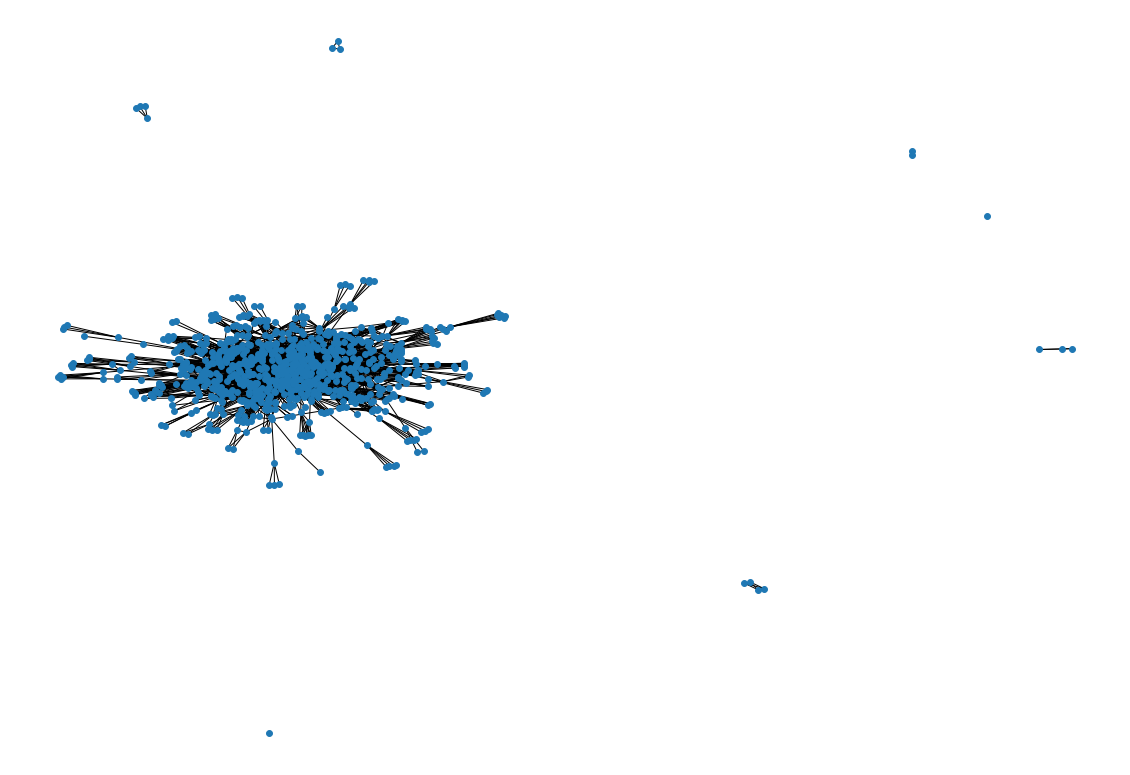

In [9]:
plt.figure(figsize=(20,14))
plt.axis("off")
nx.draw_networkx(G,pos = spring_pos, with_labels = False, node_size=35, node_color='#1f78b4')

In [10]:
G.number_of_nodes()

842

In [11]:
G.number_of_edges()

3397

### Adj and Relationship (Intersection)  - H

In [12]:
input_data = pd.read_csv(file3, index_col = 0)
H = nx.Graph(input_data.values)

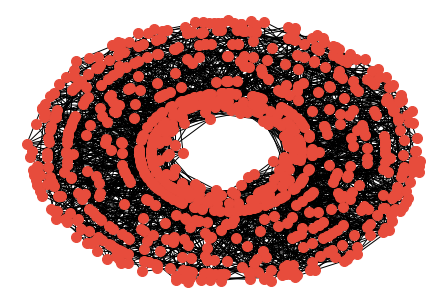

In [13]:
nx.draw_kamada_kawai(H,node_size=100, node_color='#e74c3c')
plt.show()

In [14]:
H.number_of_nodes()

842

In [15]:
H.number_of_edges()

1846

### Borrow Money from (B) 

In [16]:
input_data = pd.read_csv(file4, index_col = 0)
B = nx.Graph(input_data.values)

In [17]:
from numpy import genfromtxt
import numpy as np
mydata = genfromtxt(file4, delimiter=',')
print(mydata)
print(type(mydata))

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]
<class 'numpy.ndarray'>


In [18]:
(m,n) = mydata.shape

In [19]:
m

843

In [20]:
teste = mydata
for i in range (0,m-1):
    for j in range (0,m-1):
        if teste[i,j]==1:
            teste[j,i]=0

In [21]:
print(teste.shape)

(843, 843)


In [22]:
gr = nx.DiGraph(teste)
gr.add_edges_from(edges)
plt.figure(figsize=(20,14))
nx.draw_kamada_kawai(gr,node_size=100, node_color='#34495e')
plt.show()

NameError: name 'edges' is not defined

In [23]:
gr.number_of_nodes()

843

In [24]:
gr.number_of_edges()

2152

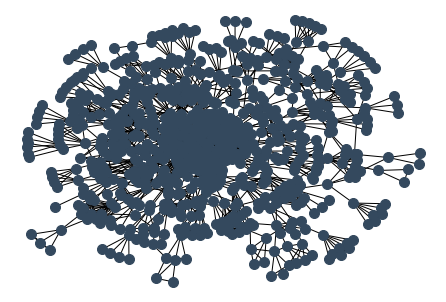

In [25]:
nx.draw_kamada_kawai(B,node_size=100, node_color='#34495e')
plt.show()

In [26]:
B.number_of_nodes()

842

In [27]:
B.number_of_edges()

2146

### Lend Money to (L)

In [28]:
input_data = pd.read_csv(file5, index_col = 0)
L = nx.Graph(input_data.values)

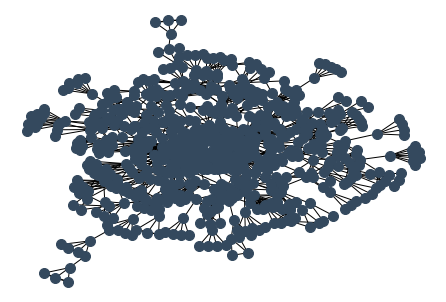

In [29]:
nx.draw_kamada_kawai(L,node_size=100, node_color='#34495e')
plt.show()

In [30]:
L.number_of_nodes()

842

In [31]:
L.number_of_edges()

2122

### Other Visualizations 

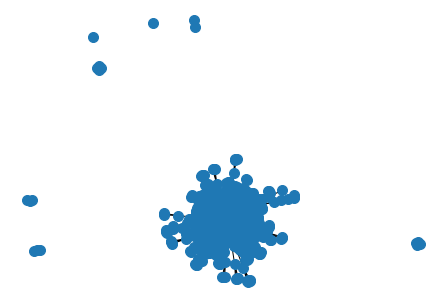

In [32]:
nx.draw_spring(G,node_size=100, node_color='#1f78b4')
plt.show()

In [33]:
# Number of connected components
nx.number_connected_components(G)

8

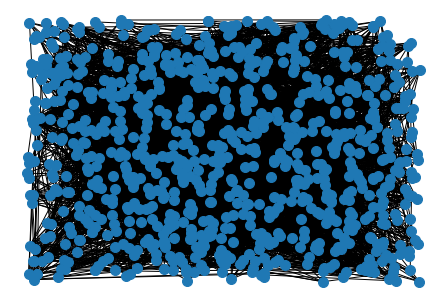

In [34]:
nx.draw_random(G,node_size=100, node_color='#1f78b4')
plt.show()

### Network Analysis - Basics

In [35]:
G.number_of_nodes()

842

In [36]:
G.number_of_edges()

3397

In [37]:
# Number of Nodes with zero degree
count = 0
for v in G.nodes():
    if (G.degree(v) == 0):
        count += 1
print(count)

2


In [38]:
# Number of Nodes with degree <= 10
count = 0
for v in G.nodes():
    if (G.degree(v) <= 10):
        count += 1
print(count)

634


In [39]:
# Number of Nodes with degree > 10
count = 0
for v in G.nodes():
    if (G.degree(v) > 10):
        count += 1
print(count)

208


In [40]:
m = nx.degree_centrality(G)

In [41]:
sorted(m, key=m.get, reverse=True)[:5]

[793, 352, 399, 160, 475]

In [42]:
from collections import Counter
dict(Counter(m).most_common(5))

{793: 0.06420927467300831,
 352: 0.05707491082045184,
 399: 0.04637336504161712,
 160: 0.04161712247324613,
 475: 0.04161712247324613}

In [43]:
page_rank = nx.pagerank(G)

In [44]:
sorted(page_rank, key=page_rank.get, reverse=True)[:5]

[793, 352, 399, 160, 475]

In [45]:
dict(Counter(page_rank).most_common(5))

{793: 0.005813217596872655,
 352: 0.0052391240709459535,
 399: 0.0045868389886874784,
 160: 0.0040117717527247115,
 475: 0.003910228238634386}

## Plot the distribution of out-degrees of nodes in the network on a log-log scale

In [46]:
degree_sequence = [d for n, d in G.degree()]

In [47]:
dist = {}
for d in degree_sequence:
    if d in dist:
        dist[d] += 1
    else:
        dist[d] = 1

In [48]:
x = []
y = []
for d in dist:
    if d>0:
        x.append(d)
        y.append(dist[d])

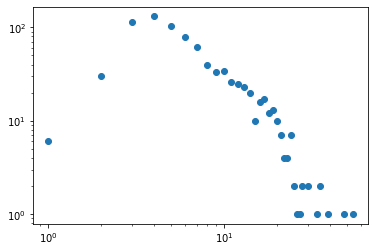

In [49]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.add_axes()
ax = fig.add_subplot(111)
ax.scatter(x,y)
plt.yscale('log')
plt.xscale('log')
plt.show()